In [47]:
import streamlit as st
import requests
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [48]:
FONT_PATH = 'SeoulNamsanB.ttf'
ZIGBANG_API_URL = 'https://apis.zigbang.com/v2/local/price?geohash=&local_level=3&period=1&transaction_type_eq=s'

In [49]:
response = requests.get(ZIGBANG_API_URL)
json = response.json()['datas']

In [50]:
columns = [ "bjdCode", "local1", "local2", "local3", "변동률",]
df = pd.json_normalize(json)[columns]
non_null_df = df.dropna(subset='변동률').copy()
non_null_df.loc[:, 'local2_3'] = non_null_df['local2'] + ' ' + non_null_df['local3']

In [51]:
pos_change_rate_area_df = non_null_df[non_null_df['변동률'] > 0]
neg_change_rate_area_df = non_null_df[non_null_df['변동률'] < 0]
pos_change_rate_area_dict = pos_change_rate_area_df.set_index('local2_3')['변동률'].to_dict()
neg_change_rate_area_dict = neg_change_rate_area_df.set_index('local2_3')['변동률'].to_dict()

In [52]:
max_cities = 100

pos_word_cloud = WordCloud(
    max_words=max_cities,
    width=600,
    height=600,
    min_font_size=7,
    font_path=FONT_PATH).generate_from_frequencies(pos_change_rate_area_dict)

neg_word_cloud = WordCloud(
    max_words=max_cities,
    width=600,
    height=600,
    min_font_size=7,
    font_path=FONT_PATH).generate_from_frequencies(neg_change_rate_area_dict)

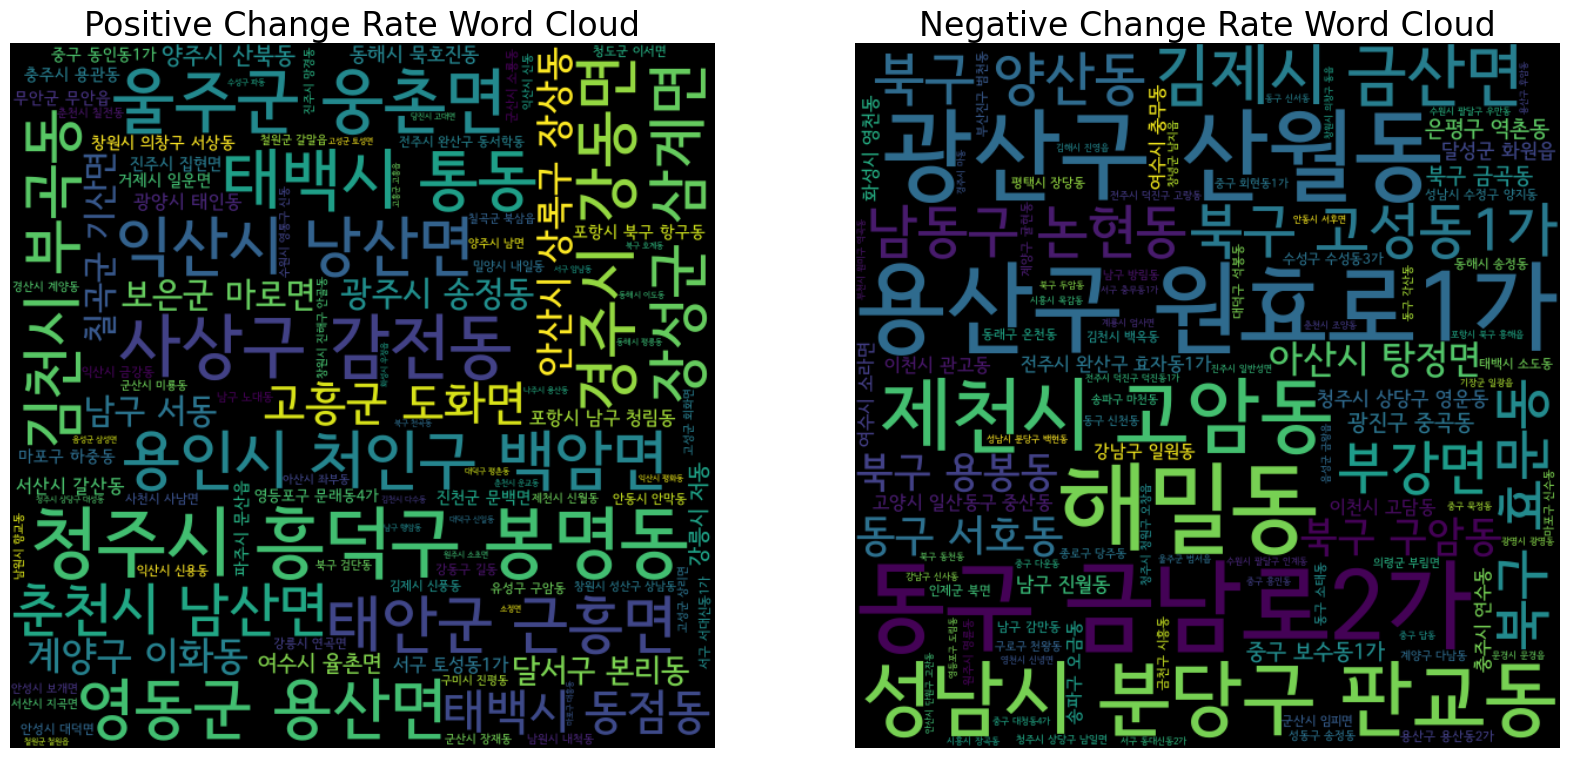

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].imshow(pos_word_cloud, interpolation='bilinear')
axes[0].set_title("Positive Change Rate Word Cloud", fontsize=24)
axes[0].axis("off")

axes[1].imshow(neg_word_cloud, interpolation='bilinear')
axes[1].set_title("Negative Change Rate Word Cloud", fontsize=24)
axes[1].axis("off")

plt.show()